# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель исследования** — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [2]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('real_estate_data.csv',sep='\t')
dataset.sample(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23325,10,3700000.0,41.70,2018-11-11T00:00:00,2,2.50,5.0,26.50,5,NaN,...,5.00,NaN,Санкт-Петербург,45176.0,11958.0,1.0,410.0,1.0,614.0,6.0
20545,4,8300000.0,60.00,2018-07-17T00:00:00,2,NaN,10.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,30743.0,4282.0,1.0,735.0,1.0,222.0,60.0
3124,11,3550000.0,38.00,2018-11-12T00:00:00,1,2.50,5.0,NaN,4,NaN,...,NaN,NaN,Пушкин,13030.0,25184.0,1.0,490.0,0.0,NaN,17.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.00,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
4404,10,7350000.0,79.60,2017-09-12T00:00:00,3,NaN,5.0,56.10,5,NaN,...,8.70,NaN,Санкт-Петербург,38757.0,8017.0,0.0,NaN,1.0,720.0,253.0
23186,3,2350000.0,33.00,2018-01-20T00:00:00,1,2.50,5.0,18.00,5,NaN,...,5.50,NaN,Петергоф,36460.0,31649.0,3.0,477.0,3.0,639.0,46.0
11773,11,4100000.0,54.00,2019-04-03T00:00:00,2,NaN,5.0,30.40,1,NaN,...,8.00,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15034,6,4200000.0,45.00,2018-05-07T00:00:00,2,2.70,9.0,27.00,8,NaN,...,7.00,1.0,Санкт-Петербург,28325.0,12847.0,1.0,403.0,1.0,243.0,176.0
15202,20,13200000.0,100.00,2017-12-12T00:00:00,3,2.80,25.0,52.00,6,NaN,...,16.00,2.0,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
676,20,4400000.0,34.60,2019-04-27T00:00:00,1,2.58,17.0,15.90,11,NaN,...,10.80,NaN,Санкт-Петербург,35815.0,12293.0,2.0,287.0,2.0,340.0,NaN


In [3]:
dataset.shape

(23699, 22)

In [4]:
dataset.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посчитаем, сколько в таблице пропущенных значений:

In [5]:
dataset.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Согласно документации к данным:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод

Изучив данные, можно сказать следующее:
1. Практически все наименования столбцов записаны правильно (поправил бы только 'cityCenters_nearest' для "визуальной" гармонии общего написания).
2. Данные по столбцу 'is_apartment' практически отсутствуют. Можно предположить, что это означате, что объект не отсосится к типу Апартаменты. Такая же ситуаци и с balcony - скорее всего если значение пропущено, значит балкона нет.
4. В столбце 'days_exposition' есть много пропущенных значений. Предполагаю, что эти пропуски связаны с тем, что объявление еще не снято с публикации.
5. Пропуски в столбцах 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest', 'locality_name', 'living_area' боюсь, что чем-то заменить не получится и придется данные по этим объектам  не учитывать при некоторых расчетах. Решим в дальнейшем.

## Предобработка данных

Приведем формат даты к более понятному виду: оставим только число-месяц-год. Часы, минуты, секунды нам я считаю не понадобятся.

In [6]:
dataset['first_day_exposition'] = pd.to_datetime(dataset['first_day_exposition'], format='%Y-%m-%d')

Переименуем столбец 'cityCenters_nearest':

In [7]:
dataset=dataset.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'})

Вначале заменим все пропущенные значения в столбцах 'is_apartment' на булевые соответствующие значения:

In [8]:
dataset['is_apartment'] = dataset['is_apartment'].replace(np.nan, False)

Так же заменим все пропущенные значения в столбцах 'balcony' на 0 и округлим до целого значения:

In [9]:
dataset['balcony'] = dataset['balcony'].replace(np.nan, 0).astype('int')   

Преобразуем значения в некоторых столбцах до целых чисел ( считаю что округление до целых числах никак не повлияет на расчет):

In [10]:
dataset['last_price']=dataset['last_price'].astype('int')
dataset['total_area']=dataset['total_area'].astype('int')

Обратим внимание еще на такой столбец как 'kitchen_area' - площадь кухни.
Предлагаю заполнить пропуски в данном столбце по следующему приницпу: кухонной медианой по группе квартир ( с группировкой по количнсву комнат).

Но вначале, для удобства, заполним все пропущенные значения в этм стобце 0 и посмотрим, в каких квартирах у нас появились кухни с площадью равной 0:

In [11]:
dataset['kitchen_area'] = dataset['kitchen_area'].replace(np.nan, 0).astype('int')
dataset_kitchen_area_null=dataset[dataset['kitchen_area'] == 0]
pivot_dataset_kitchen_area_null=pd.pivot_table(dataset_kitchen_area_null,index=['rooms'], values='kitchen_area')
print(pivot_dataset_kitchen_area_null)

       kitchen_area
rooms              
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0


In [12]:
one_room_kitchen=dataset[dataset['rooms'] == 1]
one_room_kitchen=one_room_kitchen[one_room_kitchen['kitchen_area'] !=0]
one_room_kitchen_median=one_room_kitchen['kitchen_area'].mean()
two_room_kitchen=dataset[dataset['rooms'] == 2]
two_room_kitchen=two_room_kitchen[two_room_kitchen['kitchen_area'] !=0]
two_room_kitchen_median=two_room_kitchen['kitchen_area'].mean()
three_room_kitchen=dataset[dataset['rooms'] == 3]
three_room_kitchen=three_room_kitchen[three_room_kitchen['kitchen_area'] !=0]
three_room_kitchen_median=three_room_kitchen['kitchen_area'].mean()
four_room_kitchen=dataset[dataset['rooms'] == 4]
four_room_kitchen=four_room_kitchen[four_room_kitchen['kitchen_area'] !=0]
four_room_kitchen_median=four_room_kitchen['kitchen_area'].mean()
five_room_kitchen=dataset[dataset['rooms'] == 5]
five_room_kitchen=five_room_kitchen[five_room_kitchen['kitchen_area'] !=0]
five_room_kitchen_median=five_room_kitchen['kitchen_area'].mean()
six_room_kitchen=dataset[dataset['rooms'] == 6]
six_room_kitchen=six_room_kitchen[six_room_kitchen['kitchen_area'] !=0]
six_room_kitchen_median=six_room_kitchen['kitchen_area'].mean()
seven_room_kitchen=dataset[dataset['rooms'] == 7]
seven_room_kitchen=seven_room_kitchen[seven_room_kitchen['kitchen_area'] !=0]
seven_room_kitchen_median=seven_room_kitchen['kitchen_area'].mean()
eight_room_kitchen=dataset[dataset['rooms'] == 8]
eight_room_kitchen=eight_room_kitchen[eight_room_kitchen['kitchen_area'] !=0]
eight_room_kitchen_median=eight_room_kitchen['kitchen_area'].mean()
nine_room_kitchen=dataset[dataset['rooms'] == 9]
nine_room_kitchen=nine_room_kitchen[nine_room_kitchen['kitchen_area'] !=0]
nine_room_kitchen_median=nine_room_kitchen['kitchen_area'].mean()

print('Кухонная медиана, 1 комнатная квартира:', one_room_kitchen_median)
print('Кухонная медиана, 2 комнатная квартира:', two_room_kitchen_median)
print('Кухонная медиана, 3 комнатная квартира:', three_room_kitchen_median)
print('Кухонная медиана, 4 комнатная квартира:', four_room_kitchen_median)
print('Кухонная медиана, 5 комнатная квартира:', five_room_kitchen_median)
print('Кухонная медиана, 6 комнатная квартира:', six_room_kitchen_median)
print('Кухонная медиана, 7 комнатная квартира:', seven_room_kitchen_median)
print('Кухонная медиана, 8 комнатная квартира:', eight_room_kitchen_median)
print('Кухонная медиана, 9 комнатная квартира:', nine_room_kitchen_median)


Кухонная медиана, 1 комнатная квартира: 9.294052405379176
Кухонная медиана, 2 комнатная квартира: 9.734559429042
Кухонная медиана, 3 комнатная квартира: 11.065985130111525
Кухонная медиана, 4 комнатная квартира: 13.409805735430158
Кухонная медиана, 5 комнатная квартира: 18.13684210526316
Кухонная медиана, 6 комнатная квартира: 20.814432989690722
Кухонная медиана, 7 комнатная квартира: 21.76923076923077
Кухонная медиана, 8 комнатная квартира: 24.666666666666668
Кухонная медиана, 9 комнатная квартира: 24.714285714285715


In [13]:
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 1:
            dataset['kitchen_area'][index]=five_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 2:
            dataset['kitchen_area'][index]=five_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 3:
            dataset['kitchen_area'][index]=five_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 4:
            dataset['kitchen_area'][index]=five_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 5:
            dataset['kitchen_area'][index]=five_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 6:
            dataset['kitchen_area'][index]=six_room_kitchen_median          
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 7:
            dataset['kitchen_area'][index]=seven_room_kitchen_median            
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 8:
            dataset['kitchen_area'][index]=eight_room_kitchen_median
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['rooms'][index] == 9:
            dataset['kitchen_area'][index]=nine_room_kitchen_median            
    

Проверим, заменили ли мы все значения, которе прописали:

In [14]:
dataset_kitchen_area_null=dataset[dataset['kitchen_area'] == 0]
pivot_dataset_kitchen_area_null=pd.pivot_table(dataset_kitchen_area_null,index=['rooms'], values='kitchen_area', aggfunc='sum')
print(pivot_dataset_kitchen_area_null)
pivot_dataset_kitchen_area_null=pd.pivot_table(dataset_kitchen_area_null,index=['rooms'], values='kitchen_area', aggfunc='count')
print(pivot_dataset_kitchen_area_null)

       kitchen_area
rooms              
0                 0
       kitchen_area
rooms              
0               197


Мы видим, что нулевая площадь кухни осталась только у кваритир, в которых 0 комнат. Предполагаю, что это комнаты студии. Проверим это предположение:

In [15]:
dataset_kitchen_area_null=dataset[dataset['kitchen_area'] == 0]
pivot_dataset_kitchen_area_null=pd.pivot_table(dataset_kitchen_area_null,index=['studio'], values='kitchen_area', aggfunc='count')
print(pivot_dataset_kitchen_area_null)

        kitchen_area
studio              
False             59
True             138


Да, действительно, в квартирах-студиях, указанных в объявлениях не выделана отдельно кухня. Это логично, так как зачастую это просто нереализуемо и если, например, человек практически не готовит дом, то "из кухни" в квартире-судии может быть только чайник.
Обратим внимание на то, что есть так же часть квартир (59), у которых стоит 0 комнат, но нет атрибута "студия". Предлагаю поближе изучить эти 59 квартир ( посмотреть на общую площадь и решить - студия это или нет):

In [16]:
pivot_dataset_kitchen_area_all=pd.pivot_table(dataset_kitchen_area_null,index=['total_area'], values='kitchen_area', aggfunc='count')
print(pivot_dataset_kitchen_area_all)

            kitchen_area
total_area              
15                     1
16                     1
17                     1
18                     2
19                     3
20                     4
21                     4
22                     7
23                    15
24                    22
25                    26
26                    20
27                    26
28                    18
29                    11
30                     6
31                     8
32                     8
34                     2
35                     2
38                     1
42                     2
43                     1
44                     1
58                     1
71                     1
73                     1
98                     1
371                    1


Итак, мы видим, что по площади квартиры есть и с маленькой площадью и с большой. Для квартир, у которых площадь не больше 35 кв.м. - проставим статус студии.

In [17]:
for index in range(len(dataset)):
    if dataset['kitchen_area'][index] == 0:
        if dataset['total_area'][index] <= 35:
            dataset['studio'][index]=True    
dataset_kitchen_area_null=dataset[dataset['kitchen_area'] == 0]
pivot_dataset_kitchen_area_null=pd.pivot_table(dataset_kitchen_area_null,index=['studio'], values='kitchen_area', aggfunc='count')
print(pivot_dataset_kitchen_area_null)          

        kitchen_area
studio              
False              2
True             195


Осталось 2 квартиры у которых нет статуса студии и у которых 0 комнат. Посмотрим на них поближе:

In [18]:
dataset_four=dataset[(dataset['rooms'] == 0) & (dataset['studio'] == False)]
display(dataset_four)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7237,8,2999000,42,2017-11-27,0,NaN,16.0,25.7,2,False,...,0,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
19392,5,71000000,371,2018-07-26,0,3.57,7.0,NaN,6,False,...,0,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0


Квартира на 42 кв.м. конечно может быть студией, но предлагаю пока  оставить ее как 1 комнатную квартиру. А вот с квартирой на 371 кв.м и ценой 71 млн. руб. надо что то сделть, но пока неясно что. Учитывая, что это 7ми этажный дом - то скорее всего это старый жилищный фонд. На такой площади не может быть одна большая комната, скорее всего есть деление на комнаты - но сколько их? Пока не ясно. Предлагаю эту квартиру так же сделать 1 комнатной, думаю что в дальнейшем из-за цены и такой огромной площади мы не будем ее учитывать в анализе ( посчитаем как выбросы, которые портят картину в целом).

Поменяем все значения с количеством комнат 0 на 1.

In [19]:
for index in range(len(dataset)):
    if dataset['rooms'][index] == 0:
        dataset['rooms'][index]=1

Проверим наличие явных дубликатов и посмотрим названия населенных пунктов ( что-то мне подсказывает что есть там повторения)

In [20]:
dataset['locality_name'].sort_values(ascending=True).unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Ну что ж, названий много, будем искать и править ( предварительно поправим пропущенные значения на значение 'unknown' питон иначе будет ругаться):

In [21]:
dataset['locality_name'] = dataset['locality_name'].fillna('unknown')
def replace_wrong_names (wrong_names,correct_names): 
    for wrong_name in wrong_names: 
        dataset['locality_name'] = dataset['locality_name'].replace(wrong_names, correct_names)

false_locality_yanino = ['Янино']
true_locality_yanino = 'городской посёлок Янино-1'
replace_wrong_names(false_locality_yanino, true_locality_yanino)

false_locality_murino = ['Мурино', 'поселок Мурино']
true_locality_murino = 'посёлок Мурино'
replace_wrong_names(false_locality_murino, true_locality_murino)

false_locality_bor = ['Зелёный Бор']
true_locality_bor = 'посёлок Пансионат Зелёный Бор'
replace_wrong_names(false_locality_bor, true_locality_bor)

false_locality_sverdlova = ['Свердлова']
true_locality_sverdlova = 'посёлок городского типа имени Свердлова'
replace_wrong_names(false_locality_sverdlova, true_locality_sverdlova)
print ('Дубликатов в таблице:', dataset.duplicated().sum())

Дубликатов в таблице: 0


In [22]:
dataset.info()
dataset['locality_name'].sort_values(ascending=True).unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int32         
 13  balcony         

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Сове

### Вывод

1. Мы заменили пропущенные значения в колонке 'kitchen_area' кухонной медианой по числу комнат в квартире и оставили 0 в квартирах-студиях.
2. Заменили пропуски в столбце 'is_apartment' - если были пропуски, то логично было предположить что это не апаратемнты.
3. В столбце 'balcony' в местах пропусков поставили нулевые значения ( если пропуск - то предполагаем, что балкона в квартире нет).
4. В столбце 'locality_name' объединил найденные повторяющиеся значения ( которые нашел). Пробовал данный момент сделать с помощью лемматизации, но к сожалению у меня не получилось сделать ( надо будет вернуться к теории и пошерстить данную тему еще раз).
5. Пропуски в столбце 'days_exposition' пропущенные значения ничем не заполнял - предполагаю, если пропуск - то квартира еще продается.
6. Высоту потолков в столбце 'ceiling_height' считаю, что корректно мы заполнить не смлжем. Если бы у нас был год постройки дома, тип квартиры ( чешка, сталинка и так далее) и некоторые другие пораметры, мы могли бы взять среднее значение по данным группам и заполнить пропущенные значения, но в данном случае считаю что корректно не получится заполнить.
7. Пропущенные значения по таким столбцам как: airports_nearest, city_сenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest мы никак заполнить не сможем, предлагаю оставить пропущенные значения.
8. Пропущенные значения по столбцу 'living_area' так же предлагаю оставить пропуски как есть.

## Расчёты и добавление результатов в таблицу

Добавим цену 1 кв. м в отдельный столбец :

In [23]:
dataset['last_price_one_metr'] = dataset['last_price']/dataset['total_area']
dataset['last_price_one_metr'] = dataset['last_price_one_metr']

Добавим отдельными столбцами день недели, месяц и год публикации:

In [24]:
dataset['day_exposition'] = dataset['first_day_exposition'].dt.weekday
dataset['month_exposition'] = dataset['first_day_exposition'].dt.month
dataset['year_exposition'] = dataset['first_day_exposition'].dt.year

Добавим столбец, который сгруппирует квартиры по этажам: первый, последний, другой:

In [25]:
def floor_id_def(dataset):
    if dataset['floor'] == 1:
        return 'первый'
    elif dataset['floors_total'] == dataset['floor']:
        return 'последний'
    else:
        return 'другой'
dataset['floor_id']=dataset.apply(floor_id_def, axis=1)

Найдем соотношение жилой и общей площади, а также отношение площади кухни к общей. Результат сохраним в новых столбцах:

In [26]:
dataset['percent_living_area']=dataset['living_area']/dataset['total_area']*100
dataset['percent_kitchen_area']=dataset['kitchen_area']/dataset['total_area']*100
dataset.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_one_metr,day_exposition,month_exposition,year_exposition,floor_id,percent_living_area,percent_kitchen_area
2892,7,6000000,59,2019-03-17,4,2.5,5.0,44.00,4,False,...,1.0,804.0,NaN,101694.915254,6,3,2019,другой,74.576271,11.864407
9560,14,6350000,54,2018-10-04,1,2.8,25.0,20.00,18,False,...,1.0,527.0,59.0,117592.592593,3,10,2018,другой,37.037037,35.185185
12244,0,2400000,41,2016-02-03,2,2.5,4.0,21.00,3,False,...,NaN,NaN,134.0,58536.585366,2,2,2016,другой,51.219512,17.073171
12859,20,140000000,631,2019-04-09,7,3.9,4.0,322.30,4,False,...,2.0,210.0,NaN,221870.047544,1,4,2019,последний,51.077655,3.011094
8517,20,4900000,61,2019-04-01,2,2.8,10.0,33.92,5,False,...,0.0,NaN,NaN,80327.868852,0,4,2019,другой,55.606557,18.032787


### Вывод

Добавили в датасет следующие значения:
1. Процентное отношение жилой площади и площади кухни к общей площади квартиры.
2. Указали цену квадратного метра в каждом объекте недвижимости.
3. Сделали группировку квартир по этажности (первый, последний, другой).
4. Выделили временные маркеры подачи объявления ( день недели, месяц и год).

Все эти данные в дальнейшем нам понадобятся для анализа объявлений.

## Исследовательский анализ данных

Изучим на гистограмме следующие данные: площадь, цена, число комнат, высота потолков.

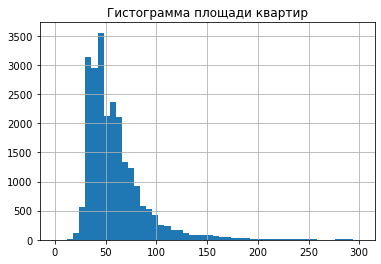

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [27]:
dataset['total_area'].hist(bins=50, range=(0,300)).set_title('Гистограмма площади квартир')
plt.show()
dataset['total_area'].describe()

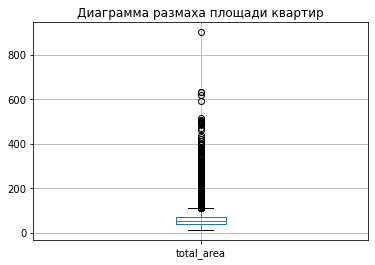

In [28]:
dataset.boxplot(['total_area']).set_title('Диаграмма размаха площади квартир')
plt.show()   

Самый популярный объект недвижимости - это квартиры с площадью в районе 52 кв. м. Квартир с площадью более 200 кв. м.и менее 20 кв.м. уже практически не встречаются в продаже. Средняя площадь квартиры 60 кв.м.
На графике видно как много количество выбросов, которые портят нам картину.
Создадим новый датасет, который отсечет выбросы:

In [29]:
dataset_total_area_new = dataset[(dataset['total_area'] <100) & (dataset['total_area'] > 0)]

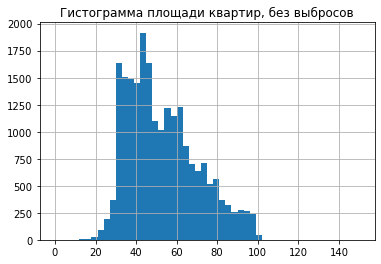

In [30]:
dataset_total_area_new['total_area'].hist(bins=50, range=(0,150)).set_title('Гистограмма площади квартир, без выбросов')
plt.show()

In [31]:
dataset_total_area_new['total_area'].describe()

count    21791.000000
mean        52.541416
std         17.367034
min         12.000000
25%         39.000000
50%         49.000000
75%         64.000000
max         99.000000
Name: total_area, dtype: float64

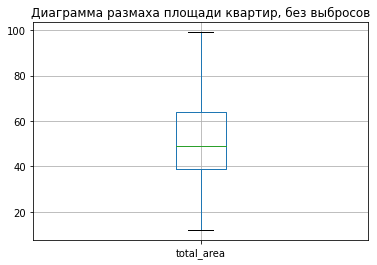

In [32]:
dataset_total_area_new.boxplot(['total_area']).set_title('Диаграмма размаха площади квартир, без выбросов')
plt.show()   

В новом датасете мы убрали выбросы, которые портили нам статистику и искажали значение средней и медианной квадратуры квартиры.
Теперь список квартир по площади более "чистый". Средняя площадь квартир, продаваймых на Яндекс.Недвижимости, составляет 52 кв.м., тогда как медианное значение 49 кв.м. Стоит отметить, что после очистки данных медиана и среднее площади квартир значительно приблизилось, и отклонение сократилось практически в два раза.

In [33]:
dataset['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

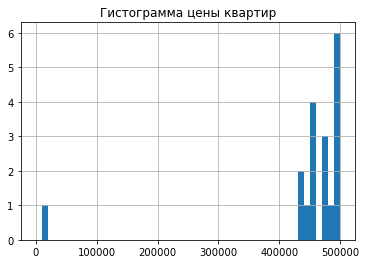

In [34]:
dataset['last_price'].hist(bins=50, range=(0,500000)).set_title('Гистограмма цены квартир')
plt.show()

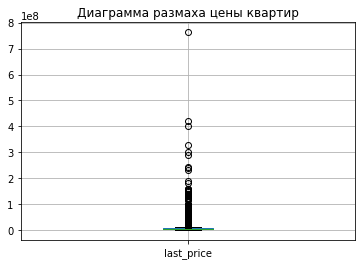

In [35]:
dataset.boxplot(['last_price']).set_title('Диаграмма размаха цены квартир')
plt.show()   

Самая дешевая квартира стоит 12 тыс. руб., а самая дорогая 763 млн. руб., что выглядит неправдоподобно (хотя как знать как знать). В дальнейшем проверим эти "выбросы". Основная масса квартир продается в пределах 4,6 млн. руб., тогда как среднее значение равно 6,5 млн. руб. Далее проверим эти данные ( стоит учитывать, что данные по разным населенным пунктам и сравнивать так цены не совсем корректно).

Почистим выбросы в стоимости квартиры, аналогично квадратуры.
Возьмем датасет, который получили после очистки от выбросов в площади квартиры.
Очистим выборку от квартир, которые стоят более 15 млн. руб.

In [36]:
dataset_last_price_new = dataset_total_area_new[(dataset_total_area_new['last_price'] <15000000)]

In [37]:
dataset_last_price_new['last_price'].describe().astype('int')

count       21555
mean      4899524
std       2392963
min        430000
25%       3300000
50%       4400000
75%       5999000
max      14999000
Name: last_price, dtype: int32

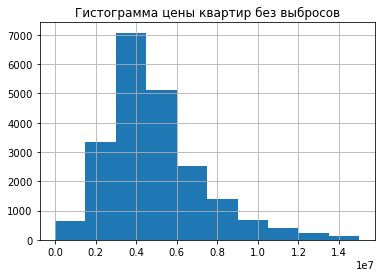

In [38]:
dataset_last_price_new['last_price'].hist(bins=10, range=(0,15000000)).set_title('Гистограмма цены квартир без выбросов')
plt.show()

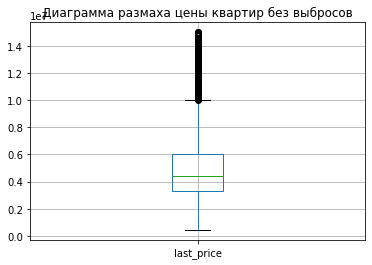

In [39]:
dataset_last_price_new.boxplot(['last_price']).set_title('Диаграмма размаха цены квартир без выбросов')
plt.show()  

После удаления явных выбросов, средняя и медианная цена квартиры "приблизились" как никогда, приэтом цена квартиры по медиане не сильно уменьшилась, но значительно уменьшиналась средняя цена квартиры ( с 6.5 млн. до 4.4 млн. руб.). Стандарное отклонение снизилось практически в 5 раз.

Посмотрим на столбец этаж. Вначале рассмотрим какие этаже представлены оригинальном датасете, а потом скорректируем его с учетом датасета без выбросов цены и площади.

In [40]:
dataset['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

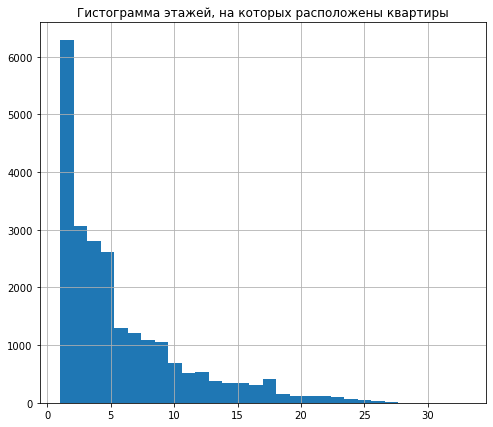

In [41]:
dataset['floor'].hist(bins=30,figsize=(8,7)).set_title('Гистограмма этажей, на которых расположены квартиры')
plt.show()

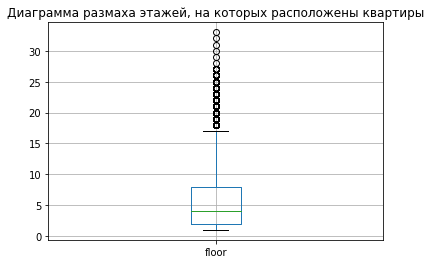

In [42]:
dataset.boxplot(['floor']).set_title('Диаграмма размаха этажей, на которых расположены квартиры')
plt.show() 

Судя по данным среднестатистическая квартира, которая продается находится на 5 этаже, медианное значение немного смещено в сторону 4 этажа (50 % квартир - это квартиры на 4 этаже). Самая высотная квартира находится на 33 этаже, наверное это квартира в 	ЖК «Князь Александр Невский»). На графике видно, что часть квартир уходят далеко за границу нормального размаха, значит это выбросы.
Посмотрим на эту выборку без выбросов:

In [43]:
dataset_floor_new = dataset_last_price_new[dataset_last_price_new['floor'] <20]

In [44]:
dataset_floor_new['floor'].describe()

count    20999.000000
mean         5.488118
std          4.170095
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         19.000000
Name: floor, dtype: float64

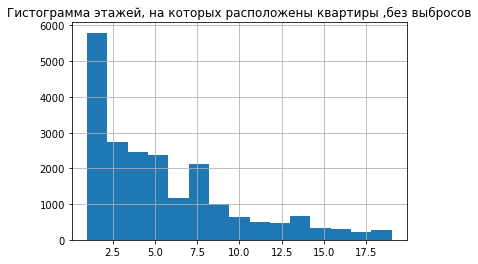

In [45]:
dataset_floor_new['floor'].hist(bins=15).set_title('Гистограмма этажей, на которых расположены квартиры ,без выбросов')
plt.show()
plt.show()

Существенных изменений после очистки выборки не произошло. Изначальные данные в принципе корректны и пригодны для анализа.

In [46]:
dataset['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

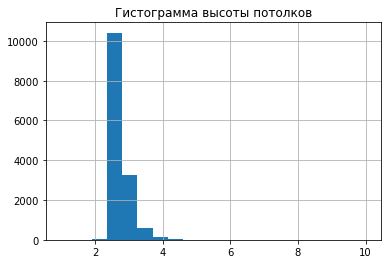

In [47]:
dataset['ceiling_height'].hist(bins=20, range=(1,10)).set_title('Гистограмма высоты потолков')
plt.show()

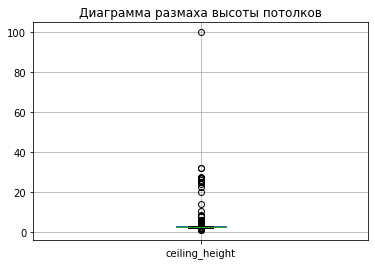

In [48]:
dataset.boxplot(['ceiling_height']).set_title('Диаграмма размаха высоты потолков')
plt.show() 

Судя по данным, расположенным в столбце 'Высота потолков', основная масса квартир, продающихся на Яндекс.Недвижимости, - это квартиры с медианным значение потолков 2,65 м., что вполне логично ( насколько я знаю 2,77 м - стандартная высота полотков в большинстве квартир). Судя по графику очень много выбросов, которые уходят за границу номрального размаха.
Высота потолков выше 3,5 м. это исключение из правил и практически не встречается, почистим выборку:

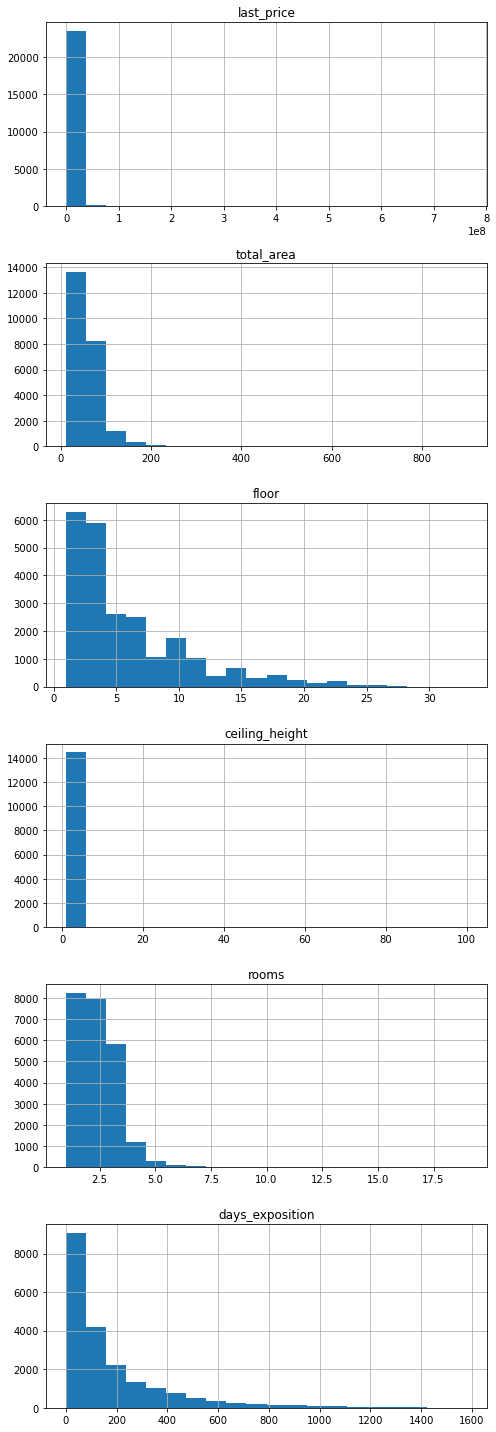

In [49]:
dataset_print=dataset[['last_price','total_area','floor','ceiling_height','rooms','days_exposition']]
fig = plt.figure()
subplt = 1
kolich_gistogram=len(dataset_print.columns)
for x in dataset_print.columns:
    ax = fig.add_subplot(kolich_gistogram, 1, subplt)
    dataset[x].hist(bins=20,figsize=(7,20)).set_title(x) 
    subplt+=1
plt.tight_layout()
plt.show()

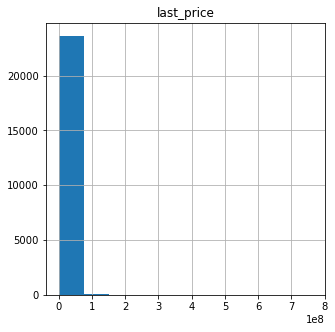

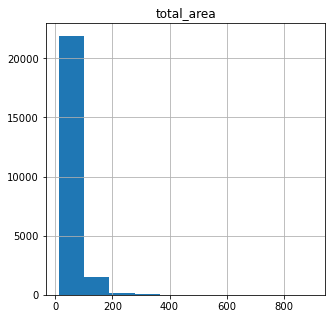

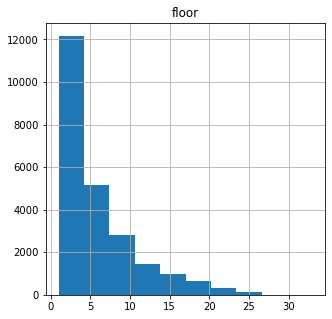

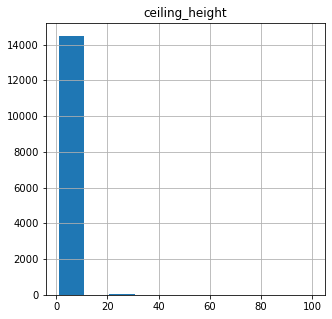

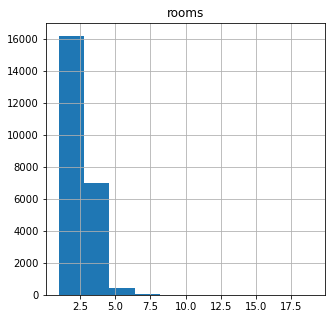

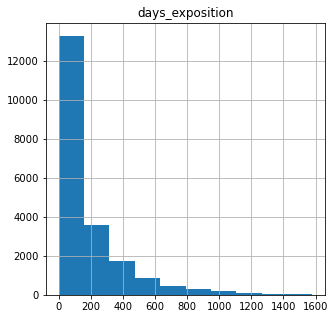

In [50]:
dataset_print_cols=['last_price','total_area','floor','ceiling_height','rooms','days_exposition']

for x in dataset_print_cols:
    dataset[x].hist(figsize=(5,5)).set_title(x)
    plt.show()

In [51]:
dataset_ceiling_height_new = dataset_floor_new[(dataset_floor_new['ceiling_height'] <3.5) &
                                               (dataset_floor_new['ceiling_height'] > 2)]

In [52]:
dataset_ceiling_height_new['ceiling_height'].describe()

count    12562.000000
mean         2.670388
std          0.189522
min          2.200000
25%          2.500000
50%          2.600000
75%          2.750000
max          3.490000
Name: ceiling_height, dtype: float64

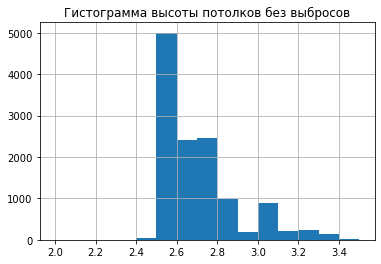

In [53]:
dataset_ceiling_height_new['ceiling_height'].hist(bins=15, range=(2,3.5)).set_title('Гистограмма высоты потолков без выбросов')
plt.show()

После удаления выдающихся значений, существенной рокировки высоты потолков не произошло в квартилях. Медиана и среднее значение высоты потолков сблизились ( практичеки равны). Стандарное отклонение уменьшилось практически в 6 раз.

In [54]:
dataset['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

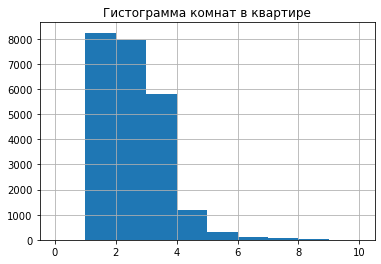

In [55]:
dataset['rooms'].hist(bins=10, range=(0,10)).set_title('Гистограмма комнат в квартире')
plt.show()

<AxesSubplot:>

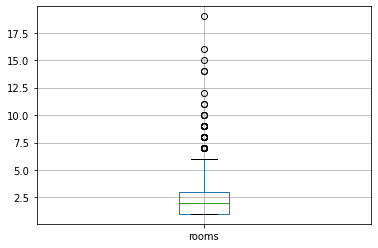

In [56]:
dataset.boxplot(['rooms']) 

50 % квартир, которые продаются, - это 2-х комнатные квартиры. Есть квартиры аж с 33 комнатами, наверное кто-то продает дворец ( очевидно выброс, которым впоследствии будем пренебрегать, однако надо будет посмотреть на площадь и возможно это 3-х комнатная квартира, просто случайно занесли 33 вместо 3). Минимальное количество комнат 1 - стоит помнить, что сюда входят и квартиры-студии ( которые мы легко можем вычленить - у них площадь кухни равна 0 кв.м.). По графику видно наличие выбросов, которые начинаются в основном после 8-10 комнат.

Удалим из выборки квартиры, в которых больше 6 комнат:

In [57]:
dataset_rooms_new = dataset_ceiling_height_new[dataset_ceiling_height_new['rooms'] < 7]

In [58]:
dataset_rooms_new['rooms'].describe()

count    12562.000000
mean         1.961312
std          0.862823
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

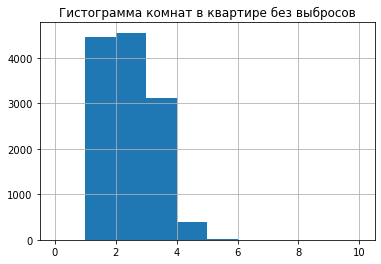

In [59]:
dataset_rooms_new['rooms'].hist(bins=10, range=(0,10)).set_title('Гистограмма комнат в квартире без выбросов')
plt.show()

Существенных изменений не произошло. Основные продающиеся квартиры - это 2х комнатные квартиры.
Из-за удаление выбросов по предыдущим "зачисткам", у нас ушли квартиры с 7 и выше комнатами.

Посмотрим за какое время продавались квартиры ( или не продавались?):

In [60]:
dataset['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

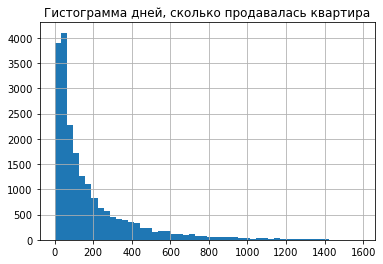

In [61]:
dataset['days_exposition'].hist(bins=50).set_title('Гистограмма дней, сколько продавалась квартира')
plt.show()

<AxesSubplot:>

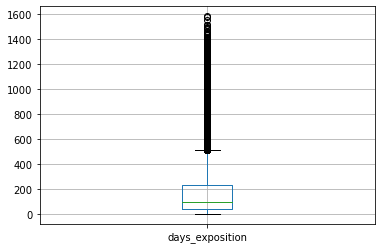

In [62]:
dataset.boxplot(['days_exposition']) 

50 % квартир продается в среднем за 3 месяца ( 95 дней). Среднее значение по всем квартирам - 180 дней ( в два раза больше медианы, что говорит о том что есть длинный "хвост", который так же изображен на графике). Есть счастливчики которые продали квартиру за 1 день, а самые долгие продажи заняли почти 3 года.
25 % квартир продается достаточно быстро  - 45 дней, другие 25 % квартир продаются в среднем за 232 дня - это слишком долго.
Видно большое количество выбросов, которые сосредоточились после 500 дней, притом их достаточно много.

Очистим выборку от квартир, которые продавались более 500 дней:

In [63]:
dataset_days_exposition_new = dataset_rooms_new[dataset_rooms_new['days_exposition'] < 500]

In [64]:
dataset_days_exposition_new['days_exposition'].describe()

count    9702.000000
mean      126.342094
std       118.489129
min         1.000000
25%        39.000000
50%        84.000000
75%       181.000000
max       499.000000
Name: days_exposition, dtype: float64

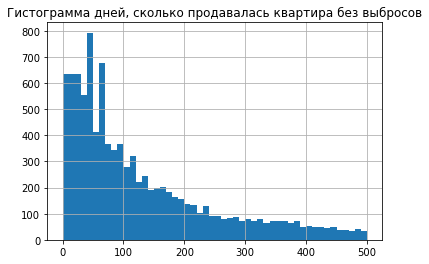

In [65]:
dataset_days_exposition_new['days_exposition'].hist(bins=50, range=(0,500)).set_title(
                                              'Гистограмма дней, сколько продавалась квартира без выбросов')
plt.show()

<AxesSubplot:>

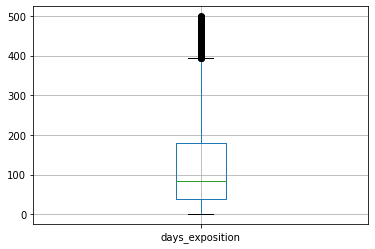

In [66]:
dataset_days_exposition_new.boxplot(['days_exposition']) 

После удаление очевидных выбросов, медиана снизилась до 84 дней, а среднее до 126 дней. Основная масса квартир теперь продается в районе 84 дней. Стали заментны всплески: на 50 и 80 днях, странно. Посмторим в дальнейшем что это.

Итак у нас есть очищенный датасет без явных выбросов, построим матрицу диаграмм рассеяния. Вначале, оставим столбцы, которые нам понадобятся.

In [67]:
dataset_new = dataset_days_exposition_new[['last_price','total_area','floor','ceiling_height','rooms','days_exposition', 
                                           'floor_id', 'day_exposition', 'month_exposition', 'year_exposition', 
                                           'city_сenters_nearest' ]]

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='day_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='month_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='year_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:

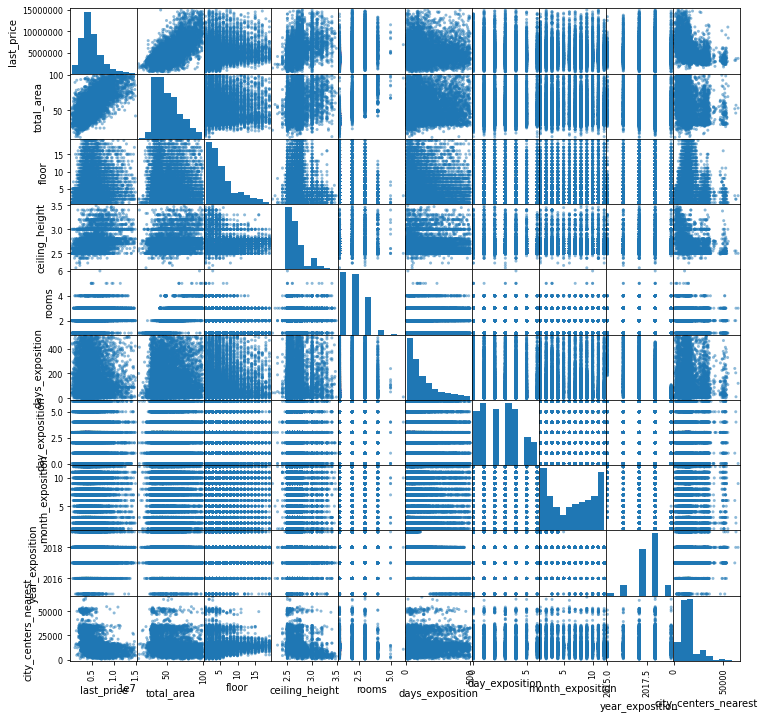

In [68]:
pd.plotting.scatter_matrix(dataset_new, figsize=(12, 12)) 

In [69]:
dataset_new.corr()

,last_price,total_area,floor,ceiling_height,rooms,days_exposition,day_exposition,month_exposition,year_exposition,city_сenters_nearest
last_price,1.000000,0.702778,0.157238,0.446683,0.421431,0.033802,-0.017483,0.002293,0.004836,-0.342230
total_area,0.702778,1.000000,-0.002787,0.318410,0.797451,0.098586,-0.012549,0.000553,-0.075749,-0.135336
floor,0.157238,-0.002787,1.000000,0.028679,-0.158659,-0.048962,0.005765,0.010402,0.002621,-0.045426
ceiling_height,0.446683,0.318410,0.028679,1.000000,0.066085,0.061665,-0.003813,-0.005034,-0.071973,-0.289162
rooms,0.421431,0.797451,-0.158659,0.066085,1.000000,0.073984,-0.001035,0.001462,-0.043985,-0.078954
days_exposition,0.033802,0.098586,-0.048962,0.061665,0.073984,1.000000,0.000148,-0.013961,-0.445669,-0.005895
day_exposition,-0.017483,-0.012549,0.005765,-0.003813,-0.001035,0.000148,1.000000,-0.016633,-0.000311,0.013957
month_exposition,0.002293,0.000553,0.010402,-0.005034,0.001462,-0.013961,-0.016633,1.000000,-0.268773,-0.033741
year_exposition,0.004836,-0.075749,0.002621,-0.071973,-0.043985,-0.445669,-0.000311,-0.268773,1.000000,0.001091
city_сenters_nearest,-0.342230,-0.135336,-0.045426,-0.289162,-0.078954,-0.005895,0.013957,-0.033741,0.001091,1.000000


Изучив матрицу диаграмм рассеивания, можно сделать следующие выводы:
1. Цена квартиры растер в заивисимости от площади квартиры, но не линейно, а немного  в разноброс. Чем выше площадь квартиры - тем выше цена.
2. Зависимость между колличеством комнат в квартире и ценой так же присутствует, однако она не такая сильная как зависимость между ценой и плошадью квартиры. ( далее посмотрим получше с помощью сводных таблиц). Видно что цена на квартиры с 2-4 комнатами выше чем у квартир с 1 комнатой.
3. Зависимость между первым и последним этажом здесь мы изучить не сможем, посмотрим в сводных таблицах. Если говорить в целом зависимость между ценой кварты и этажом - слабо прослеживается.
4. Прослеживается взаимосвязь между ценой и удаленностью от центра: чем дальше от центра тем цена будет ниже, но связь достаточно слабая.
5. Взаимосвязи между ценой и от тогда когда было размещено объявления ( день, месяц, год)  отсутствет.

Посмотрим на цены квартиры в зависимости от этажа:

In [70]:
pivot_table_floor=pd.pivot_table(dataset_new,index=['floor_id'], values='last_price', aggfunc='median')
print(pivot_table_floor)

           last_price
floor_id             
другой        4600000
первый        3800000
последний     4135000


Как и следовало ожидать, квартиры на первом и на последнем этаже ниже в цене, чем другие.

Посмотрим на цены квартиры в зависимости от количесва комнат:

In [71]:
pivot_table_rooms=pd.pivot_table(dataset_new,index=['rooms'], values='last_price', aggfunc='median')
print(pivot_table_rooms)

       last_price
rooms            
1         3590000
2         4700000
3         5700000
4         6325000
5         6780000
6         6864000


<AxesSubplot:title={'center':'last_price и rooms'}, xlabel='rooms'>

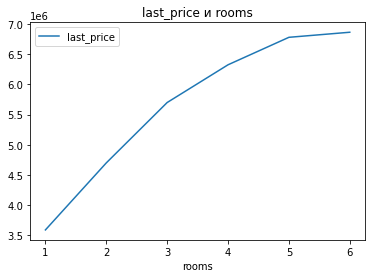

In [72]:
pivot_table_rooms.plot(title='last_price и rooms') 

Вот мы и доказали наглядно, что чем больше комнат в квартире, тем выше цена.

Далее найдем 10 населенных пунктов, в которых сосредоточено больше всего объявлений. Предлагаю использовать очищенный датасет, так как в дальнейшем нам надо будет найти среднюю цену кв.м. в этих населенных пунктах, а это корректнее делать по очищенным данным.

In [73]:
dataset_days_exposition_new['locality_name'].value_counts().head(10)

Санкт-Петербург      6576
Всеволожск            193
посёлок Мурино        171
Колпино               165
посёлок Шушары        165
Пушкин                151
Гатчина               111
Петергоф              107
деревня Кудрово       101
посёлок Парголово      91
Name: locality_name, dtype: int64

Создадим новый датасет, с 10кой лидирующих населенных пунктов в объявлениях:

In [74]:
ten_name=['Санкт-Петербург', 'Всеволожск', 'Колпино', 'посёлок Шушары', 'посёлок Мурино', 'Пушкин', 'Гатчина', 'Петергоф', 'деревня Кудрово', 'посёлок Парголово']
dataset_ten_name=dataset_days_exposition_new[(dataset_days_exposition_new['locality_name'] == 'Санкт-Петербург') |  
                                             (dataset_days_exposition_new['locality_name'] == 'Всеволожск') |
                                             (dataset_days_exposition_new['locality_name'] == 'Колпино') |
                                             (dataset_days_exposition_new['locality_name'] == 'посёлок Шушары') |
                                             (dataset_days_exposition_new['locality_name'] == 'посёлок Мурино') |
                                             (dataset_days_exposition_new['locality_name'] == 'Пушкин') |
                                             (dataset_days_exposition_new['locality_name'] == 'Гатчина') |
                                             (dataset_days_exposition_new['locality_name'] == 'Петергоф') |
                                             (dataset_days_exposition_new['locality_name'] == 'деревня Кудрово') |
                                             (dataset_days_exposition_new['locality_name'] == 'посёлок Парголово')].reset_index(drop=True)

In [75]:
pivot_table_mean_price=pd.pivot_table(dataset_ten_name,index=['locality_name'], values='last_price_one_metr', aggfunc='mean')
print(pivot_table_mean_price)

                   last_price_one_metr
locality_name                         
Всеволожск                66151.515729
Гатчина                   70554.939141
Колпино                   75183.874556
Петергоф                  83438.427943
Пушкин                    99389.400629
Санкт-Петербург          106724.999917
деревня Кудрово           91679.279300
посёлок Мурино            88089.145509
посёлок Парголово         88977.109852
посёлок Шушары            78869.290942


Как и ожидалось из 10 городов самые дорогие метры в Санкт-Петербурге и Пушкино. Рейтинг самых дешевых квадратных метров взгравляют такие населенные пункты как: Всеволожск, Гатчина и Колпино.

Оценим квартиры, расположенные ближе всего к центру города Санкт-Петербурга. Вначале отсортируем объявления в Санкт-Петерберге, удалим пропуски и переведем расстояние до центра в километры:

In [76]:
dataset_centre_piter=dataset_days_exposition_new[(dataset_days_exposition_new['locality_name'] == 'Санкт-Петербург')]
dataset_centre_piter = dataset_centre_piter.dropna(subset=['city_сenters_nearest']) 
dataset_centre_piter['city_сenters_nearest']=dataset_centre_piter['city_сenters_nearest']/1000
dataset_centre_piter['city_сenters_nearest']=dataset_centre_piter['city_сenters_nearest'].astype('int')

Расчитаем "среднюю цену" километра:

In [77]:
pivot_table_price_km=pd.pivot_table(dataset_centre_piter,index=['city_сenters_nearest'], values='last_price_one_metr', aggfunc='mean')
print(pivot_table_price_km)

                      last_price_one_metr
city_сenters_nearest                     
0                           128535.713387
1                           122331.275358
2                           118703.366128
3                           118305.561316
4                           126331.783311
5                           126208.294243
6                           117525.411286
7                           120459.744952
8                           117150.068615
9                           108890.596499
10                          106821.081381
11                          105232.096427
12                          106458.618487
13                          105870.101583
14                          102471.283178
15                          101450.146378
16                           97625.020715
17                           95542.382891
18                           93197.875704
19                           94465.519788
20                          104601.310781
21                           91011

Построим график зависимости цены 1 кв.м от расстояния до центра:

<AxesSubplot:title={'center':'last_price_one_metr и city_сenters_nearest'}, xlabel='city_сenters_nearest'>

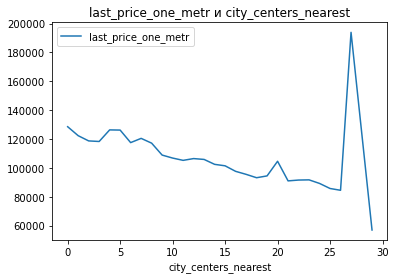

In [78]:
pivot_table_price_km.plot(title='last_price_one_metr и city_сenters_nearest') 

Цена за 1 кв.м. меняется достаточно плавно при удалении от центра города, резкого падения цен нет. Но стоит заменить, что на где-то после удаления на 8 км от центра цена за 1 кв. м. начинает стабильно падать. Имеются два всплеска на 19 км и на 27 км. Интересно что это за объекты:

In [79]:
dataset_centre_piter_op=dataset_centre_piter[(dataset_centre_piter['city_сenters_nearest'] == 27) | (dataset_centre_piter['city_сenters_nearest'] == 20)]
display(dataset_centre_piter_op)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_one_metr,day_exposition,month_exposition,year_exposition,floor_id,percent_living_area,percent_kitchen_area
533,15,5900000,67,2019-01-11,3,2.50,9.0,48.50,8,False,...,0.0,NaN,95.0,88059.701493,4,1,2019,другой,72.388060,8.955224
673,5,4789500,46,2019-03-19,1,3.00,3.0,NaN,1,False,...,0.0,NaN,34.0,104119.565217,1,3,2019,первый,NaN,23.913043
748,13,14350000,74,2017-11-28,2,3.13,5.0,30.00,3,False,...,0.0,NaN,128.0,193918.918919,1,11,2017,другой,40.540541,33.783784
2854,5,3350000,30,2017-06-22,1,2.50,9.0,17.80,6,False,...,0.0,NaN,120.0,111666.666667,3,6,2017,другой,59.333333,20.000000
2975,9,4931398,42,2018-07-23,1,3.15,4.0,20.39,3,True,...,1.0,792.0,273.0,117414.238095,0,7,2018,другой,48.547619,23.809524
3621,6,2900000,30,2018-08-22,1,2.50,9.0,17.80,5,False,...,0.0,NaN,24.0,96666.666667,2,8,2018,другой,59.333333,20.000000
3736,7,6390000,54,2018-01-19,3,2.60,12.0,31.00,10,False,...,2.0,339.0,4.0,118333.333333,4,1,2018,другой,57.407407,20.370370
4156,0,5550000,63,2016-03-23,3,2.55,9.0,45.80,8,False,...,0.0,NaN,220.0,88095.238095,2,3,2016,другой,72.698413,9.523810
4650,14,4500000,37,2018-10-12,1,2.56,16.0,20.00,10,False,...,2.0,301.0,93.0,121621.621622,4,10,2018,другой,54.054054,27.027027
6823,10,4500000,62,2017-03-25,3,2.50,9.0,41.90,2,False,...,0.0,NaN,322.0,72580.645161,5,3,2017,другой,67.580645,9.677419


Судя по осмотру данных - с этими объектами все хорошо. Предполагаю что для данных объектов просто цена 1 кв.м. на данном километраже выбивается из среднего значения ( мы не рассматривали выбросы в данном разрезе выше, пожтому появились эти всплески).

Создадим новый датасет, где будут квратиры в центре Санкт-Петербурга:

In [80]:
dataset_centre_piter_new=dataset_centre_piter[dataset_centre_piter['city_сenters_nearest'] <=8]

Изучим средние значения этик квартир: площадь, число комнат, высоту потолков:

count    1311.000000
mean        2.185355
std         0.866668
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

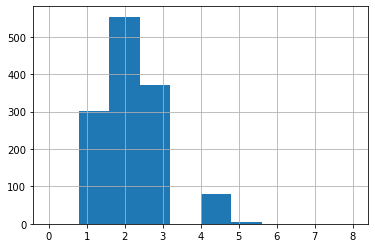

In [81]:
dataset_centre_piter_new['rooms'].hist(bins=10, range=(0,8))
dataset_centre_piter_new['rooms'].describe()

Так же как и в общей выборке - основная масса квартир, представленных к продаже, это 2х комнатные квартиры. Однако в Санкт-Петербурге в первом квартиле также преобладают 2хкомнатные квартиры ( в общей массе в первом квартеле были 1 комнатные квартиры).

count    1311.000000
mean        2.882525
std         0.252926
min         2.400000
25%         2.700000
50%         2.900000
75%         3.050000
max         3.490000
Name: ceiling_height, dtype: float64

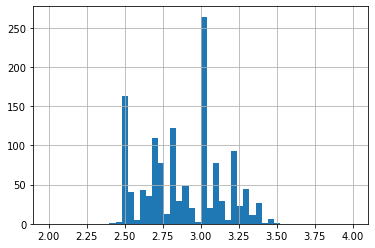

In [82]:
dataset_centre_piter_new['ceiling_height'].hist(bins=50, range=(2,4))
dataset_centre_piter_new['ceiling_height'].describe()

Судя по данным нового датасета, в центре Санкт-Петербурга среднее и медианное значение высоты потолков выросло до 2,88 и 2,9 м соответственно. Это и логично, центр Санкт-Петербурга - это в основном старый жилищный фонд, в котором высота потолков как правило всегда выше чем в новых домах.

count    1311.000000
mean       60.912281
std        19.063232
min        12.000000
25%        45.000000
50%        60.000000
75%        75.500000
max        99.000000
Name: total_area, dtype: float64

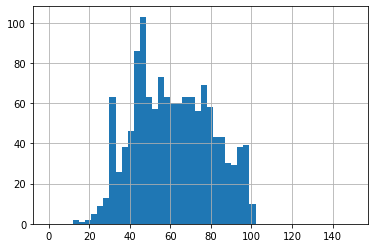

In [83]:
dataset_centre_piter_new['total_area'].hist(bins=50, range=(0,150))
dataset_centre_piter_new['total_area'].describe()

Средняя и медианная площадь квартиры в центре Санкт-Петербурге так же выше, чем в среднем по выборке. Во-первых это обьясняется тем, что ( как мы уже выяснили) в центре продаются в основном 2х комнатные квартиры, а во-вторых опять таки старый жилишный фонд, в котором площадь квартир больше.

count        1311
mean      7245626
std       2623625
min       1600000
25%       5300000
50%       6800000
75%       8800000
max      14948000
Name: last_price, dtype: int32

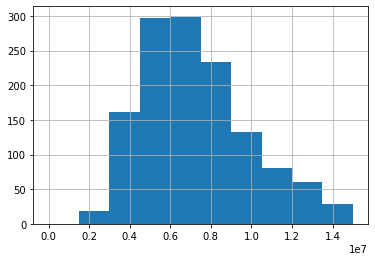

In [84]:
dataset_centre_piter_new['last_price'].hist(bins=10, range=(0,15000000))
dataset_centre_piter_new['last_price'].describe().astype('int')

Жить в центре Сант-Петербурга не дешево: квартиры в центре стоят практически в 1,5 раза дороже по сравнению с другими объявлениями.

In [85]:
dataset_centre_piter_new.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_one_metr,day_exposition,month_exposition,year_exposition,percent_living_area,percent_kitchen_area
total_images,1.000000,0.151374,0.072048,0.035691,0.041751,-0.074653,0.043916,-0.001616,-0.009223,-0.047870,...,-0.035852,-0.008515,-0.021401,0.039812,0.124467,0.028571,0.026489,0.109669,-0.037899,-0.021734
last_price,0.151374,1.000000,0.709939,0.422560,0.294738,0.109408,0.535093,0.152140,-0.019443,-0.108144,...,0.067378,0.160008,-0.041473,0.108575,0.492179,-0.008448,-0.023761,0.003097,-0.039591,-0.084977
total_area,0.072048,0.709939,1.000000,0.790796,0.353727,-0.071297,0.889027,-0.000463,-0.043369,-0.144981,...,0.021017,0.091694,-0.054243,0.148052,-0.226964,-0.005139,-0.003461,-0.063327,0.214798,-0.321821
rooms,0.035691,0.422560,0.790796,1.000000,0.265836,-0.238655,0.863157,-0.143764,-0.037803,-0.119956,...,-0.039843,0.010085,-0.063036,0.105912,-0.368786,0.005456,0.012320,-0.033141,0.512894,-0.430704
ceiling_height,0.041751,0.294738,0.353727,0.265836,1.000000,-0.245975,0.323991,-0.181123,-0.014482,0.010568,...,-0.051412,0.086128,0.001963,0.101483,0.012868,-0.005271,-0.016350,-0.073520,0.049140,-0.045056
floors_total,-0.074653,0.109408,-0.071297,-0.238655,-0.245975,1.000000,-0.197138,0.674859,0.007964,0.029114,...,0.048859,0.005385,0.013594,-0.047888,0.238678,-0.027243,-0.010633,0.005279,-0.329190,0.205449
living_area,0.043916,0.535093,0.889027,0.863157,0.323991,-0.197138,1.000000,-0.089159,-0.032377,-0.092267,...,-0.050858,0.051824,-0.052499,0.115457,-0.324555,0.024705,-0.006247,-0.033902,0.616072,-0.453921
floor,-0.001616,0.152140,-0.000463,-0.143764,-0.181123,0.674859,-0.089159,1.000000,0.005625,-0.010242,...,0.033111,-0.001112,-0.011993,-0.020319,0.201044,0.015501,-0.024939,0.024769,-0.200878,0.123990
is_apartment,-0.009223,-0.019443,-0.043369,-0.037803,-0.014482,0.007964,-0.032377,0.005625,1.000000,-0.002422,...,-0.022979,0.046546,-0.039151,-0.028530,0.047360,-0.008250,-0.036535,0.017173,0.016445,0.000894
studio,-0.047870,-0.108144,-0.144981,-0.119956,0.010568,0.029114,-0.092267,-0.010242,-0.002422,1.000000,...,-0.019373,0.025147,0.027575,-0.058963,0.040839,-0.005871,-0.005469,0.002800,0.085812,-0.114524


### Вывод

Мы провели анализ квартир в центре Санкт-Петербурга. Что можно сказать:
1. Как и в случает с остальными объектами цена квартиры в центре Санкт-петербурга растет при увеличении площади квартиры ( этот же актуально и жилой площади квартиры).
2. Цена квартиры так же зависит от количества комнат в квартире, однако тут связь ниже чем в общем списке объявления. Скорее всего это связано с тем, что в центре как мы выяснили в основном продаются 2х комнатыные квартиры и нет такого разнообразия как в общем списке.
3. Цена практически не зависит от дня, месяца и года размещения объявления. Стоит конечно помнить, что цены на квартиры растут каждый год.
4. В центре квартиры всегда стоят дорого, и изменение цены не слишком связано в удаленность от цента в центре ( простите за тавталогию).

## Общий вывод

1. Датасет, представленный нам на изучение, имел достаточно много пропусков. Некоторые из них мы смогли заполнить ( например статус квартиры студии или апартаментов, наличие балконов). Но большинство значений остались пустыми - по хорошему надо было бы узнать почему появились эти пропуски, но к сожалению нам не у кого спросить это.
2. Добавили новые столбца, которые использовали в дальнейшем для исследования: цена 1 кв.м., сгруппировали квартиры по этажности ( первый, последний, другой).
3. Что мы выяснили про цены квартир:
   * В общей выборке - чем дальше от центра тем квартира дешевле ( для квартир, расположенных в центре Санкт-петербурга, данное правило практически не действует)
   * При увеличении площади квартиры ( как общей так и жилой) цена квартиры увеличивается.
   * Чем больше комнат тем выше цена.
   * Высота потолков несущественно влияет на цену объекта недвижимости.
   * Первый и последний этаж - не самый желанный вариант - на эти позиции цена всегда ниже, квартиры между первым и вторым этаже - лучший вариант.
   * День, месяц и год публикации объявления не влияет на цену квартиры ( но стоит помнить, что цены растут каждый год)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод